In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Loading the data in a pandas DataFrame
data = pd.read_csv(r"C:\Users\intel\Desktop\help\sampled_data2.csv")
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [3]:
# Checking the shape of data
data.shape

(25200, 8)

In [4]:
# Checking null values in dataset
data.isnull().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

In [5]:
# Checking the data-types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
data.describe()

,amount,fraud
count,25200.000000,25200.000000
mean,174.212506,0.285714
std,501.116240,0.451763
min,0.000000,0.000000
25%,17.720000,0.000000
50%,36.340000,0.000000
75%,109.180000,1.000000
max,8329.960000,1.000000


In [7]:
# Using Label Encoder to converting categorical features to Numerical values
le = LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,137,709,2,2,16,12,15.78,0
1,174,2999,1,1,1,0,608.32,1
2,94,1453,1,1,28,12,43.76,0
3,122,556,2,1,16,12,41.57,0
4,5,1513,2,2,28,12,42.97,0


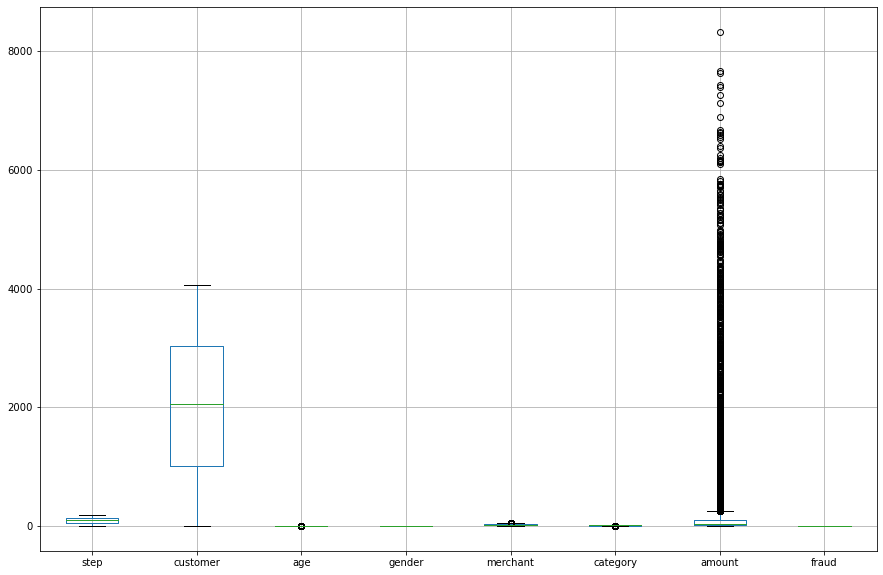

In [8]:
#Checking outliers using box plot
plt.figure(figsize=(15,10))
data.boxplot()
plt.show()

In [9]:
# Calculate the IQR
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
data['amount'] = np.clip(data['amount'], Q1-1.5*IQR, Q3+1.5*IQR)

print(IQR)

91.46000000000001


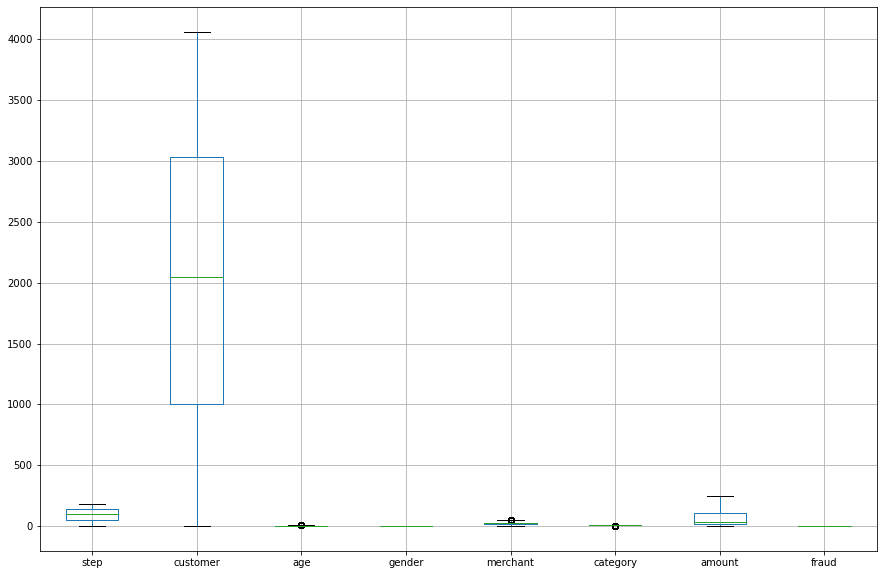

In [10]:
# Boxplot After removing outliers
plt.figure(figsize=(15,10))
data.boxplot()
plt.show()

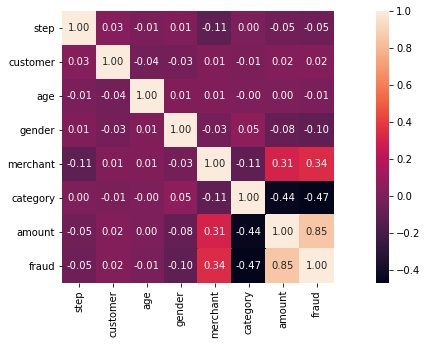

In [11]:
# Checking Correlation between diffrent features
corrmat = data.corr()
fig = plt.figure(figsize = (15,5))

sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10})
plt.show()

In [12]:
# Pearson's correlation is used to find the linear relationship between independent and dependent variable
from scipy.stats import pearsonr
var = ['step','customer','age','gender','merchant','category','amount']
for col in var:
    coef, pval = pearsonr(data[col], data.fraud)
    print('Correlation b/w fraud and %s - coef: %.2f, pval: %f' %(col, coef, pval))

Correlation b/w fraud and step - coef: -0.05, pval: 0.000000
Correlation b/w fraud and customer - coef: 0.02, pval: 0.000703
Correlation b/w fraud and age - coef: -0.01, pval: 0.095583
Correlation b/w fraud and gender - coef: -0.10, pval: 0.000000
Correlation b/w fraud and merchant - coef: 0.34, pval: 0.000000
Correlation b/w fraud and category - coef: -0.47, pval: 0.000000
Correlation b/w fraud and amount - coef: 0.85, pval: 0.000000


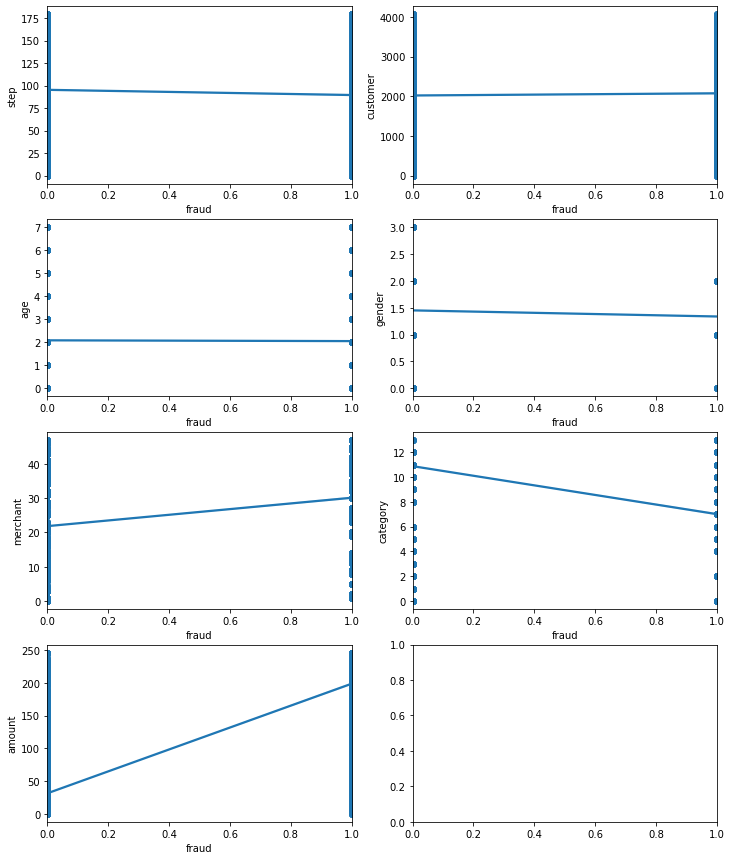

In [13]:
# Visualizing fraud Vs other features to generate insights
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(12,15))
i = 0
j = 0
for var in ['step','customer','age','gender','merchant','category','amount']:
    sns.regplot(x='fraud', y=var, data =data, ax= axs[i][j])
    j +=1
    if j>1:
        i += 1
        j =0

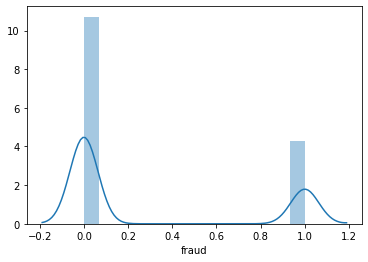

In [14]:
# Checking skewness in data
sns.distplot(data.fraud);

In [15]:
X = data.iloc[:,:5]
y = data['fraud']

In [16]:
# Splitting the dataset using sklearn, with 75% for testing with random_state = 42
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.75, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6300, 5)
(18900, 5)
(6300,)
(18900,)


In [17]:
# Applying LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr.fit(X_train, y_train)
# Predicting on X_test dataset
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.771323   0.721158  0.327168  0.450127


In [18]:
# Lets Check the Confusion matrix
confusion_matrix(y_test, y_pred)

array([[12809,   684],
       [ 3638,  1769]], dtype=int64)

In [19]:
# Lets Check the roc_auc_score
roc_auc_score(y_test, y_pred)

0.6382377666979259

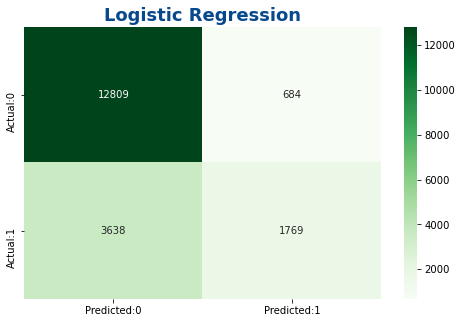

In [20]:
dcm = confusion_matrix(y_test, y_pred)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Greens')
fm = {'size':18,'color':'#08488d','weight':'bold'}
plt.title('Logistic Regression', **fm)
plt.show()

In [21]:
# Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)
# Predicting Test Set
y_pred_rf = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.771323   0.721158  0.327168  0.450127
1  Random Forest(Entropy)  0.959524   0.902253  0.962826  0.931556


In [22]:
# Lets Check the Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[12929   564]
 [  201  5206]]


In [23]:
# Lets Check the roc_auc_score
roc_auc_score(y_test, y_pred_rf)

0.9605132573862251

In [24]:
# Lets Check the classification report of the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13493
           1       0.90      0.96      0.93      5407

    accuracy                           0.96     18900
   macro avg       0.94      0.96      0.95     18900
weighted avg       0.96      0.96      0.96     18900



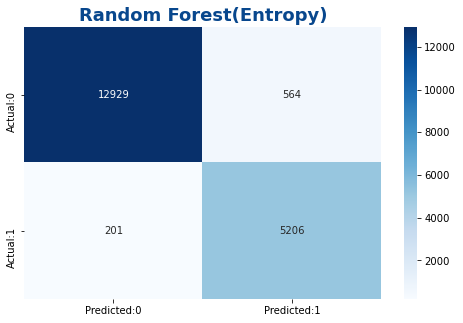

In [25]:
dcm = confusion_matrix(y_test, y_pred_rf)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Blues')
fm = {'size':18,'color':'#08478d','weight':'bold'}
plt.title('Random Forest(Entropy)', **fm)
plt.show()

In [26]:
# Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion='gini', class_weight='balanced', random_state=42)
rfc1.fit(X_train, y_train)
# Predicting Test Set
y_pred_rf1 = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf1)
prec = precision_score(y_test, y_pred_rf1)
rec = recall_score(y_test, y_pred_rf1)
f1 = f1_score(y_test, y_pred_rf1)
model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.771323   0.721158  0.327168  0.450127
1  Random Forest(Entropy)  0.959524   0.902253  0.962826  0.931556
2     Random Forest(Gini)  0.959524   0.902253  0.962826  0.931556


In [27]:
# Lets Check the Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf1))

[[12929   564]
 [  201  5206]]


In [28]:
# Lets Check the roc_auc_score
roc_auc_score(y_test, y_pred_rf1)

0.9605132573862251

In [29]:
# Lets Check the classification report of the model
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13493
           1       0.90      0.96      0.93      5407

    accuracy                           0.96     18900
   macro avg       0.94      0.96      0.95     18900
weighted avg       0.96      0.96      0.96     18900



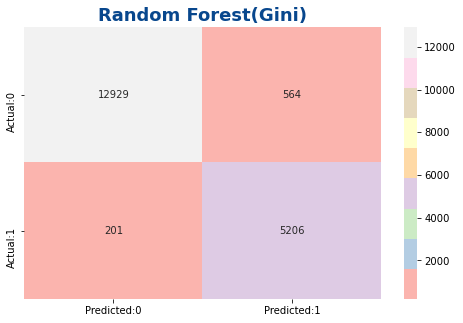

In [31]:
dcm = confusion_matrix(y_test, y_pred_rf1)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Pastel1')
fm = {'size':18,'color':'#08478d','weight':'bold'}
plt.title('Random Forest(Gini)', **fm)
plt.show()

In [32]:
# Applying LinearSVC
from sklearn.svm import  LinearSVC
svm = LinearSVC(dual= False, max_iter=2000)
svm.fit(X_train, y_train)

LinearSVC(dual=False, max_iter=2000)

In [33]:
y_pred_svm = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.771323   0.721158  0.327168  0.450127
1  Random Forest(Entropy)  0.959524   0.902253  0.962826  0.931556
2     Random Forest(Gini)  0.959524   0.902253  0.962826  0.931556
3  Support Vector Machine  0.773333   0.734251  0.325504  0.451051


In [34]:
# Lets Check the Confusion Matrix
print(confusion_matrix(y_test, y_pred_svm))

[[12856   637]
 [ 3647  1760]]


In [35]:
# Lets Check the roc_auc_score
roc_auc_score(y_test, y_pred_svm)

0.6391471560283105

In [36]:
# Lets Check the classification report of the model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     13493
           1       0.73      0.33      0.45      5407

    accuracy                           0.77     18900
   macro avg       0.76      0.64      0.65     18900
weighted avg       0.77      0.77      0.74     18900



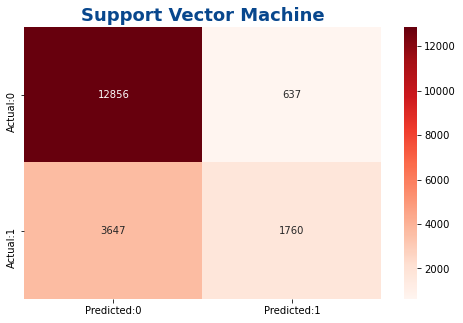

In [37]:
dcm = confusion_matrix(y_test, y_pred_svm)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Reds')
fm = {'size':18,'color':'#08478d','weight':'bold'}
plt.title('Support Vector Machine', **fm)
plt.show()

In [38]:
# Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Predicting Test Set
y_pred_gnb = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
model_results = pd.DataFrame([['GaussianNB', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.771323   0.721158  0.327168  0.450127
1  Random Forest(Entropy)  0.959524   0.902253  0.962826  0.931556
2     Random Forest(Gini)  0.959524   0.902253  0.962826  0.931556
3  Support Vector Machine  0.773333   0.734251  0.325504  0.451051
4              GaussianNB  0.773175   0.694040  0.370446  0.483058


In [39]:
# Lets Check the Confusion Matrix
print(confusion_matrix(y_test, y_pred_gnb))

[[12610   883]
 [ 3404  2003]]


In [40]:
# Lets Check the roc_auc_score
roc_auc_score(y_test, y_pred_gnb)

0.6525021892794941

In [41]:
# Lets Check the classification report of the model
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     13493
           1       0.69      0.37      0.48      5407

    accuracy                           0.77     18900
   macro avg       0.74      0.65      0.67     18900
weighted avg       0.76      0.77      0.75     18900



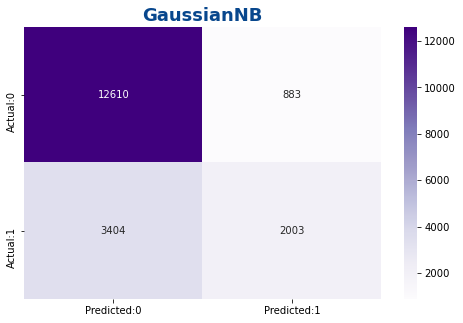

In [42]:
dcm = confusion_matrix(y_test, y_pred_gnb)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Purples')
fm = {'size':18,'color':'#08478d','weight':'bold'}
plt.title('GaussianNB', **fm)
plt.show()